## Exercise solution

In [1]:
import numpy as np
N = 10000
rng = np.random.default_rng(1234)
xy = rng.uniform(low=0., high=1., size=[2,N])
v = np.sum(xy**2, axis=0)
res = np.sum(v<1)/N * 4
print(res)

3.1408


or, more compactely

In [2]:
np.sum(np.sum(rng.uniform(0.,1.,size=[2,N])**2,axis=0)<1)/N*4

3.1372

Let's compare the speed of this code with the python one

In [3]:
import random

In [4]:
%%timeit
n = 0
N = 10000
for i in range(N):
    x = random.uniform(0.,1.)
    y = random.uniform(0.,1.)
    if (x**2 + y**2) < 1:
        n += 1
res = n/N * 4

2.09 ms ± 40.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [5]:
%%timeit
np.sum(np.sum(rng.uniform(low=0., high=1., size=[2,N])**2, axis=0)<1)/N*4

101 µs ± 255 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<img src="matplotlib.png">

## Matplotlib
Matplotlib is probably the most used Python package for 2D-graphics. It provides both a quick way to visualize data from Python and publication-quality figures in many formats.  
Other visualization packages exists, often these are built on top of `matplotlib`. 
The package is well integrated into IPython and Jupyter.

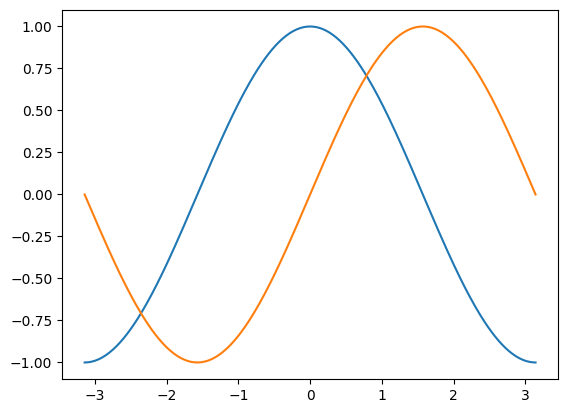

In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)
C, S = np.cos(X), np.sin(X)
plt.plot(X,C)
plt.plot(X,S)

#### Customization 

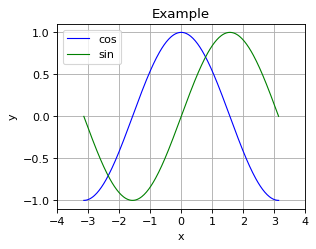

In [7]:
plt.figure(figsize=(4, 3), dpi=80)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label="cos")
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sin")
plt.xlim(-4.0, 4.0)
plt.xticks(np.linspace(-4, 4, 9, endpoint=True))
plt.savefig("example.png", dpi=72)
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Example")
plt.legend(loc="best")

#### Multiple plots

In [8]:
plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-", label="cos")
plt.subplot(2, 2, 2)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-", label="sin")
plt.subplot(2, 2, 3)
plt.plot(X, C, color="red", linewidth=1.0, linestyle="-", label="cos")
plt.subplot(2, 2, 4)
plt.plot(X, S, color="black", linewidth=1.0, linestyle="-", label="sin")
plt.show()

### Examples

In [9]:
plt.rcdefaults()
fig, ax = plt.subplots(figsize=(4,3))
# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))
ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

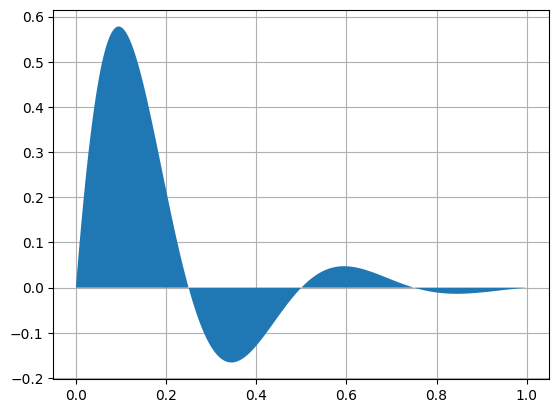

In [10]:
x = np.linspace(0, 1, 500)
y = np.sin(4 * np.pi * x) * np.exp(-5 * x)
fig, ax = plt.subplots()
ax.fill(x, y, zorder=10)
ax.grid(True, zorder=5)
plt.show()

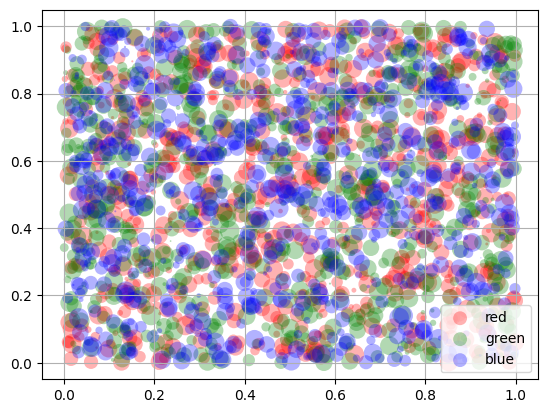

In [11]:
fig, ax = plt.subplots()
for color in ['red', 'green', 'blue']:
    n = 750
    x, y = np.random.rand(2, n)
    scale = 200.0 * np.random.rand(n)
    ax.scatter(x, y, c=color, s=scale, label=color,
               alpha=0.3, edgecolors='none')

ax.legend()
ax.grid(True)

plt.show()

In [12]:
mu = 200
sigma = 25
x = np.random.normal(mu, sigma, size=100)
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(6, 3))
ax0.hist(x, 20, density=1, histtype='stepfilled', facecolor='g', alpha=0.75)
ax0.set_title('stepfilled')
# Create a histogram by providing the bin edges (unequally spaced).
bins = [100, 150, 180, 195, 205, 220, 250, 300]
ax1.hist(x, bins, density=1, histtype='bar', rwidth=0.8)
ax1.set_title('unequal bins')
plt.title(r'Histogram of IQ: $\mu=100$, $\sigma=15$');

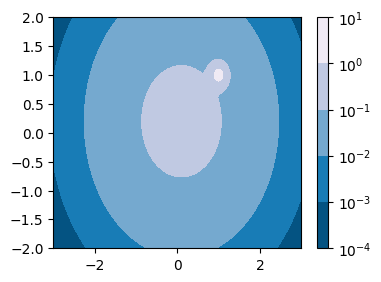

In [13]:
from matplotlib import colors, ticker, cm
from scipy.stats import multivariate_normal

N = 100
x = np.linspace(-3.0, 3.0, N)
y = np.linspace(-2.0, 2.0, N)

X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape+(2,))
pos[:,:,0] = X; pos[:,:,1] = Y
# A low hump with a spike coming out of the top right.
# Needs to have z/colour axis on a log scale so we see both hump and spike.
# linear scale only shows the spike.
z = (multivariate_normal([0.1, 0.2], [[1.0, 0.],[0, 1.0]]).pdf(pos)
     + 0.1 * (multivariate_normal([1.0, 1.0],[[0.01, 0.],[0., 0.01]])).pdf(pos))
# Automatic selection of levels works; setting the
# log locator tells contourf to use a log scale:
fig, ax = plt.subplots(figsize=(4,3))
cs = ax.contourf(X, Y, z, locator=ticker.LogLocator(), cmap=cm.PuBu_r)
cbar = fig.colorbar(cs)


<img src="seaborn.png" style="width:100%">

<img src="bokeh.png" style="width:100%">

<h2>Exercise</h2>

<ul>
    <li>
        do a scatter plot of the  points sampled to compute pi, highlighting the points falling in the circle
    </li>
    <li>
        plot the value of pi as a function of the number of samples generated
    </li>
</ul>    

if you wanto to try not to do a foor loop have a look of <a href="https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html" target=blank>np.cumsum</a>, <br />
a function to compute the cumulative sum of the elements of an array